# All Regressor Models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/rock_density_xray.csv')

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rebound Signal Strength nHz  300 non-null    float64
 1   Rock Density kg/m3           300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [5]:
df.columns = ['X_Signal', 'Density']

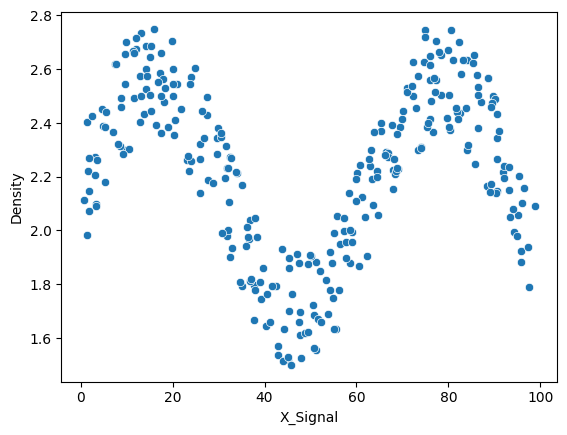

In [8]:
sns.scatterplot(x = 'X_Signal', y = 'Density', data=df)
plt.show()

In [17]:
X = df.X_Signal.values.reshape(-1, 1)
y = df.Density

In [10]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state =101)

In [20]:
from sklearn.linear_model import LinearRegression

## Linear Regression Model

In [21]:
lr_model = LinearRegression()

In [22]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [23]:
lr_pred = lr_model.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

In [27]:
print(mean_absolute_error(y_test, lr_pred))
print(mean_squared_error(y_test, lr_pred))
print(root_mean_squared_error(y_test, lr_pred))

0.211198973318633
0.06605167265148638
0.2570051996584629


In [43]:
signal_range = np.arange(0, 100)

In [41]:
density_pred = lr_model.predict(signal_range.reshape(-1,1))

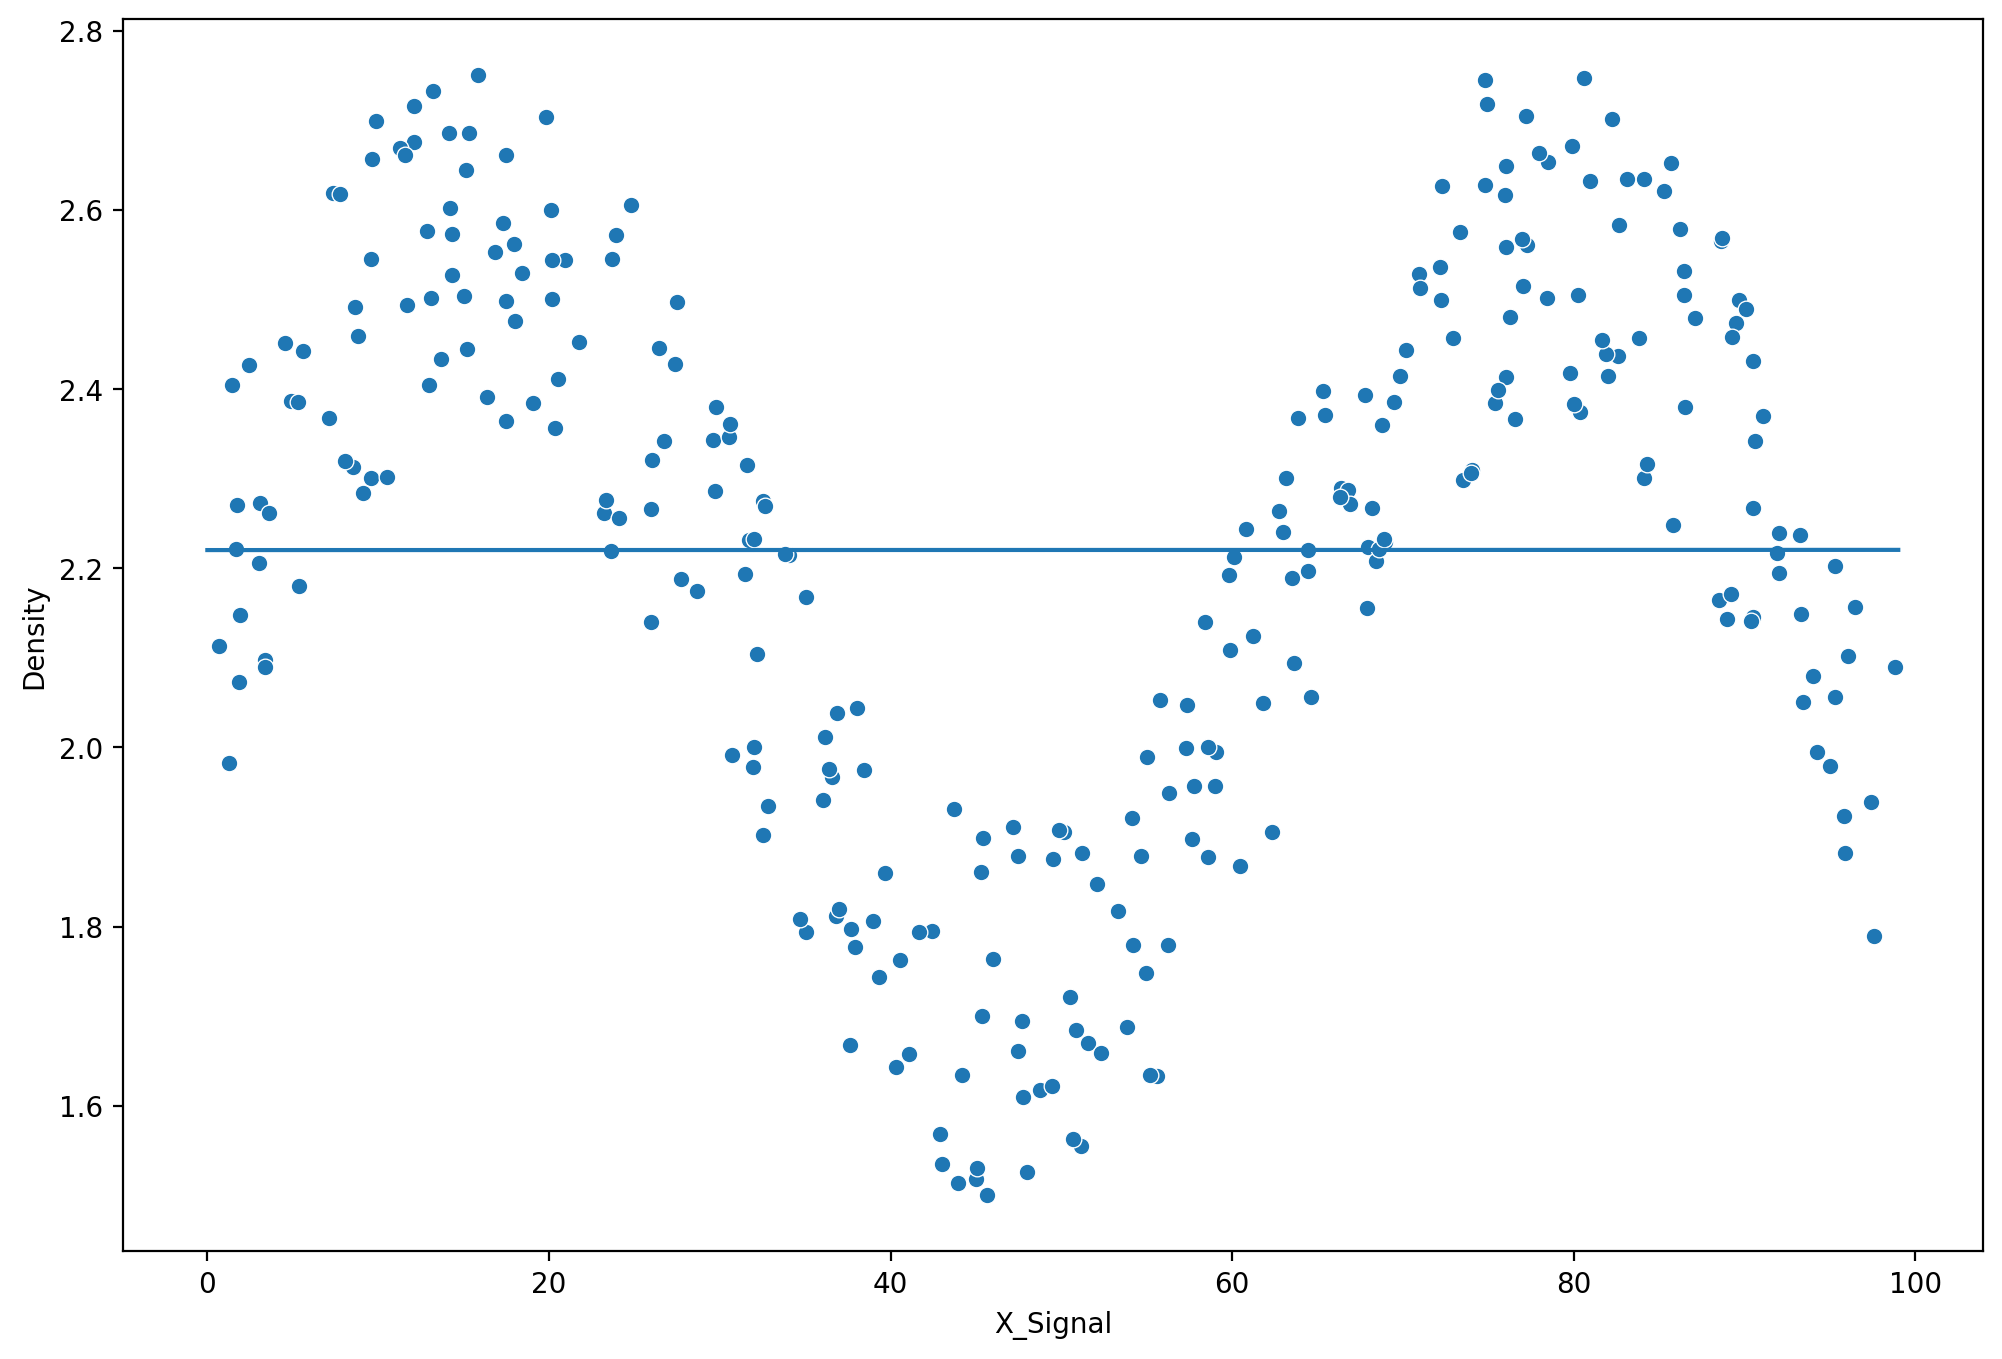

In [45]:
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(x='X_Signal', y = 'Density', data = df)

plt.plot(signal_range, density_pred)
plt.show()

In [53]:
def run_model(model, X_train, y_train, X_test, y_test):
    
    # Fit Model Training
    model.fit(X_train, y_train)
    print('Model Trained')

    # Get Metrics
    pred = model.predict(X_test)
    print('Model Predicted')
    rmse = root_mean_squared_error(y_test, pred)
    print(f'RMSE: {rmse}')
    mae = mean_absolute_error(y_test, pred)
    print(f'MAE: {mae}')

    # Plot Results
    signal_range = np.arange(0, 100)
    output = model.predict(signal_range.reshape(-1, 1))
    print('Scatter plot with regression line')
    plt.figure(figsize = (12, 8), dpi = 200)
    sns.scatterplot(x = 'X_Signal', y = 'Density', data = df, color = 'red')
    plt.plot(signal_range, output)
    plt.show()

Model Trained
Model Predicted
Root Mean Squared Error: 0.2570051996584629
Mean Absolute Error: 0.211198973318633


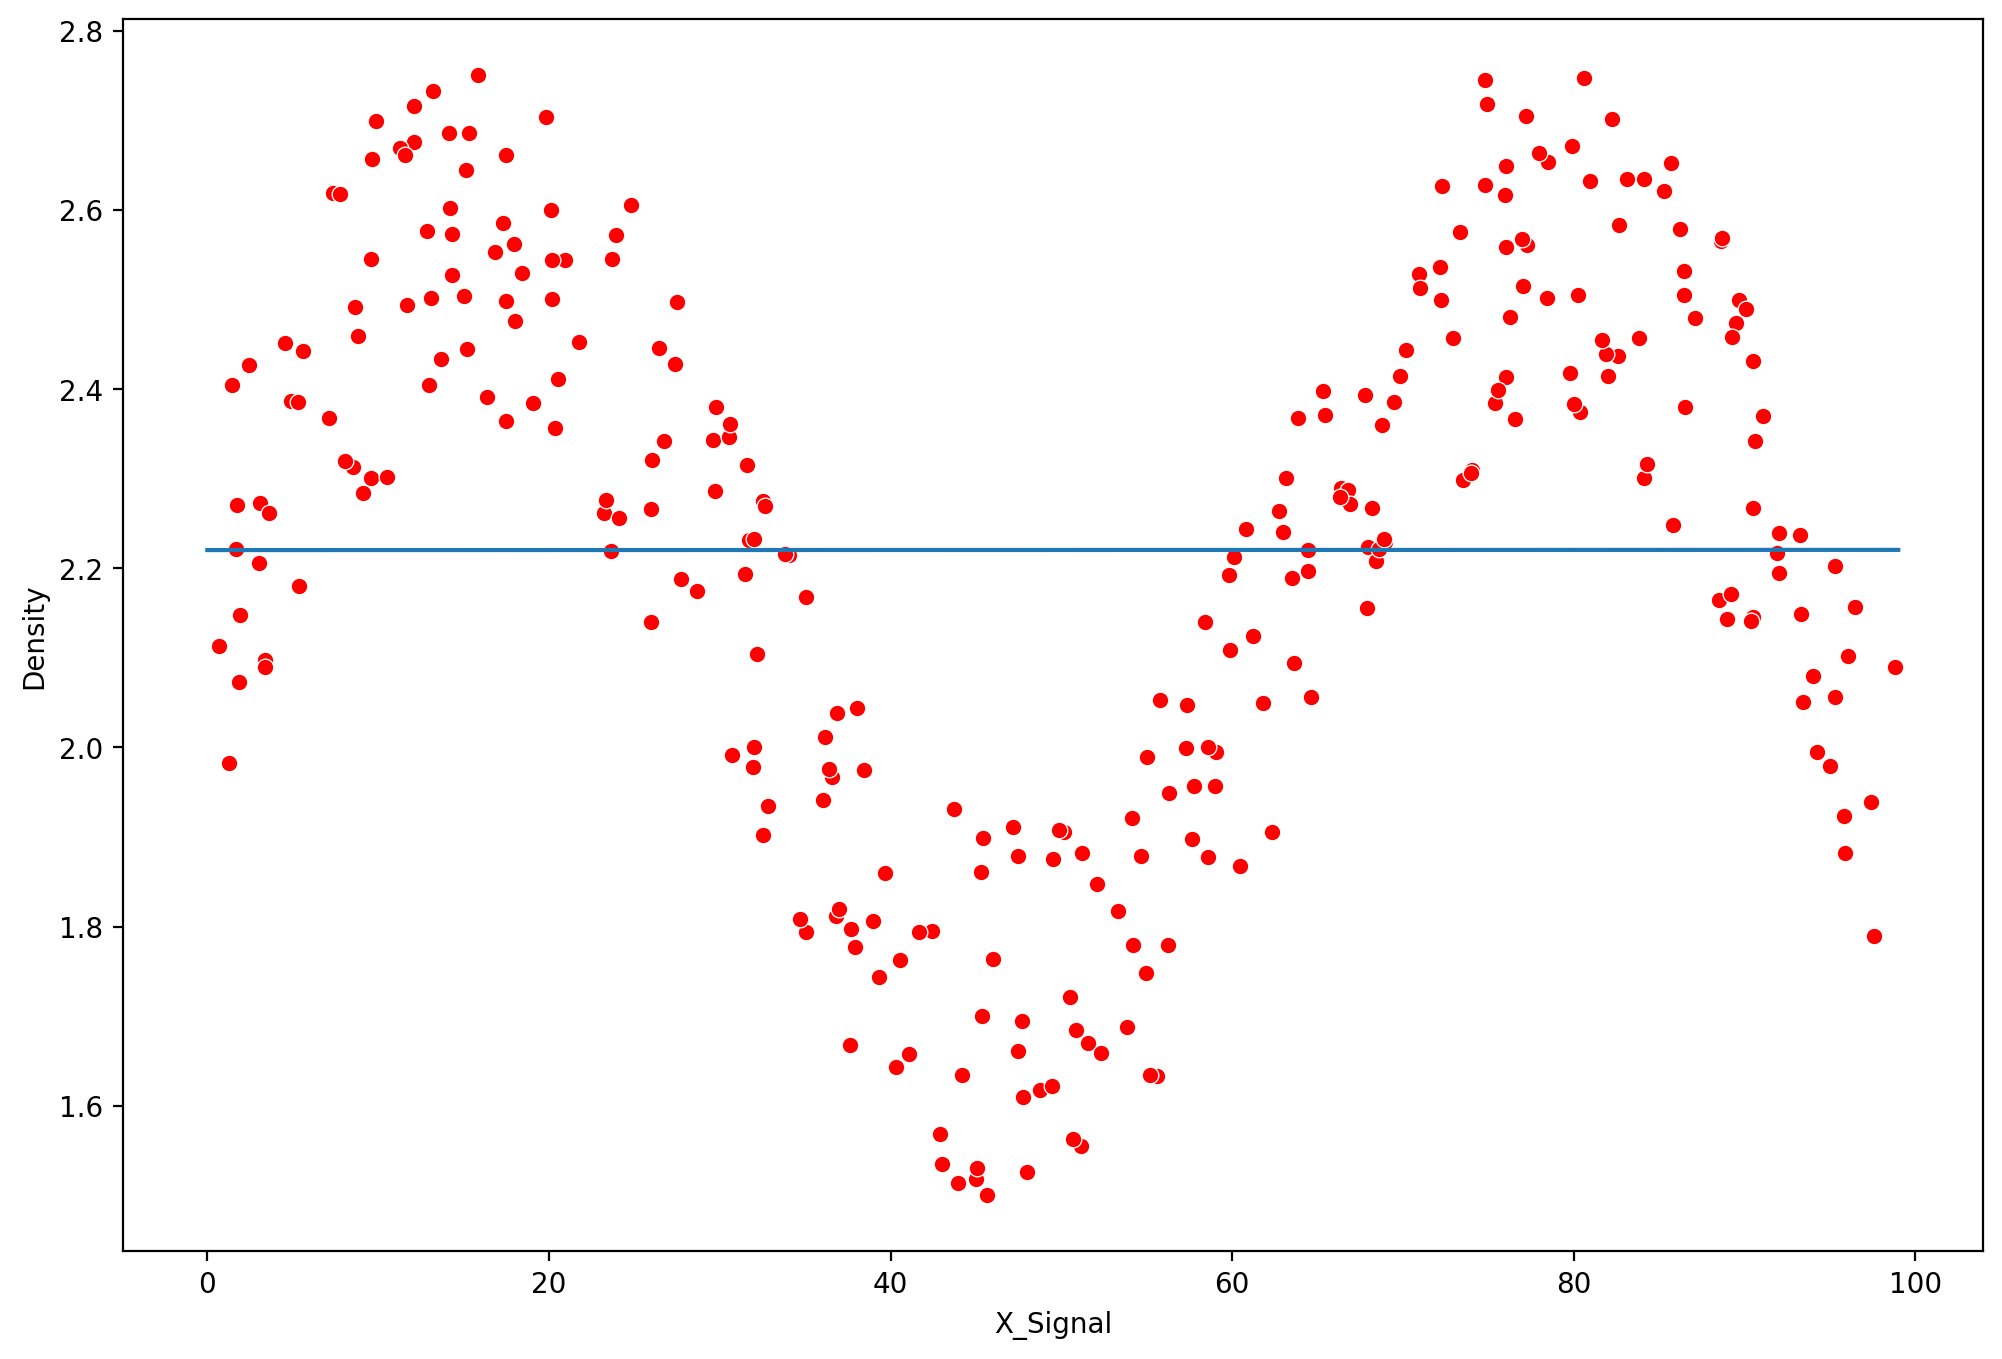

In [52]:
model = LinearRegression()
run_model(model, X_train, y_train, X_test, y_test)

# Polynomial Model

In [54]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [68]:
pipe = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())

Model Trained
Model Predicted
RMSE: 0.13807520083403252
MAE: 0.11969168049270058
Scatter plot with regression line


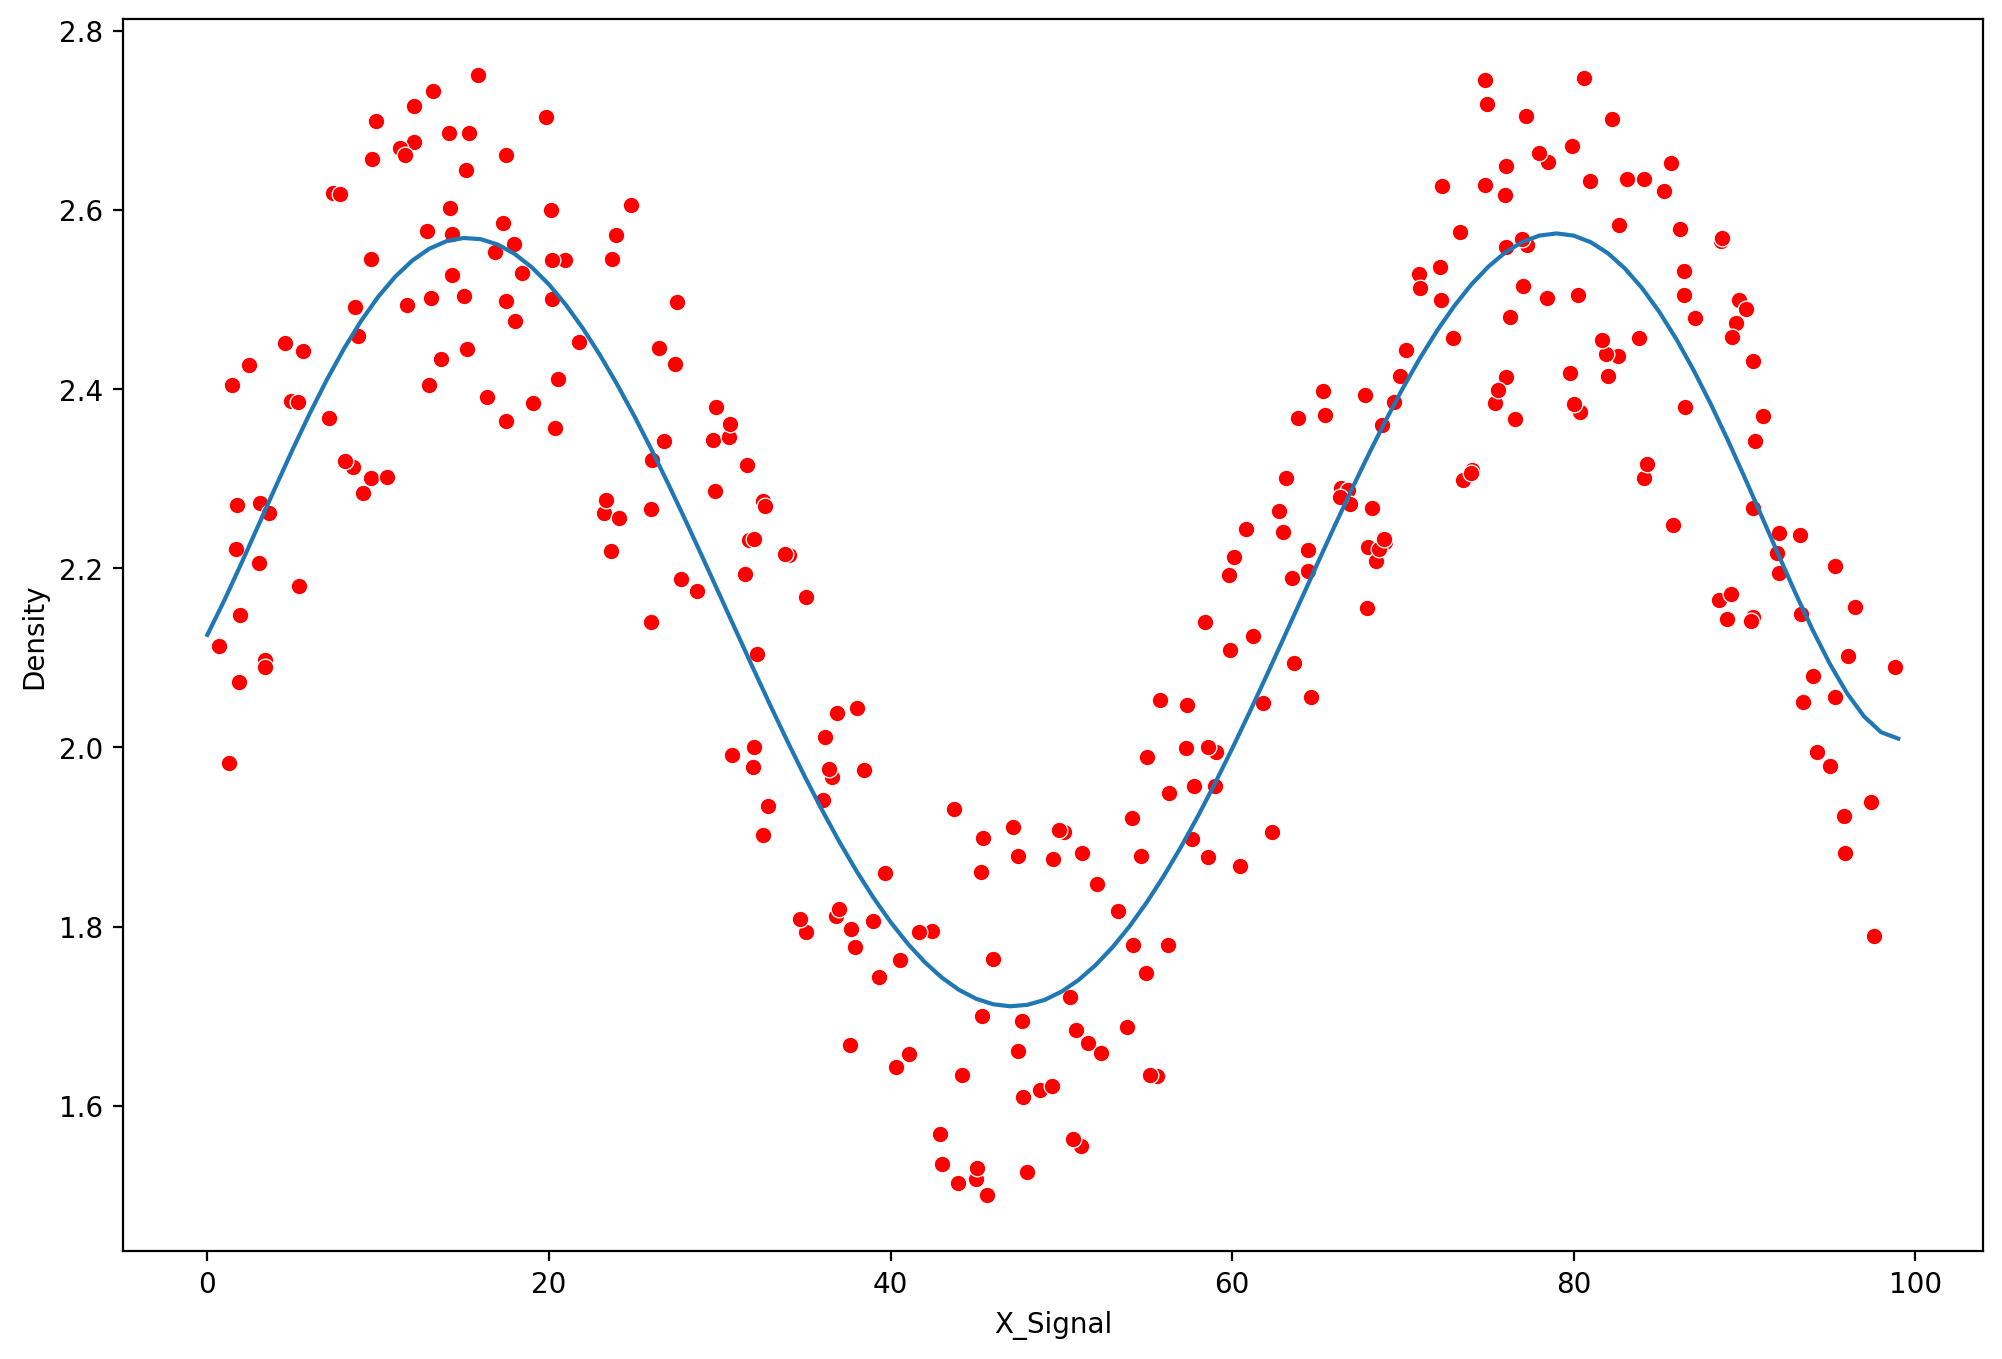

In [69]:
run_model(pipe, X_train, y_train, X_test, y_test)

# KNN Model

In [70]:
from sklearn.neighbors import KNeighborsRegressor

K value: 20
Model Trained
Model Predicted
RMSE: 0.1397499127378895
MAE: 0.1207030971917154
Scatter plot with regression line


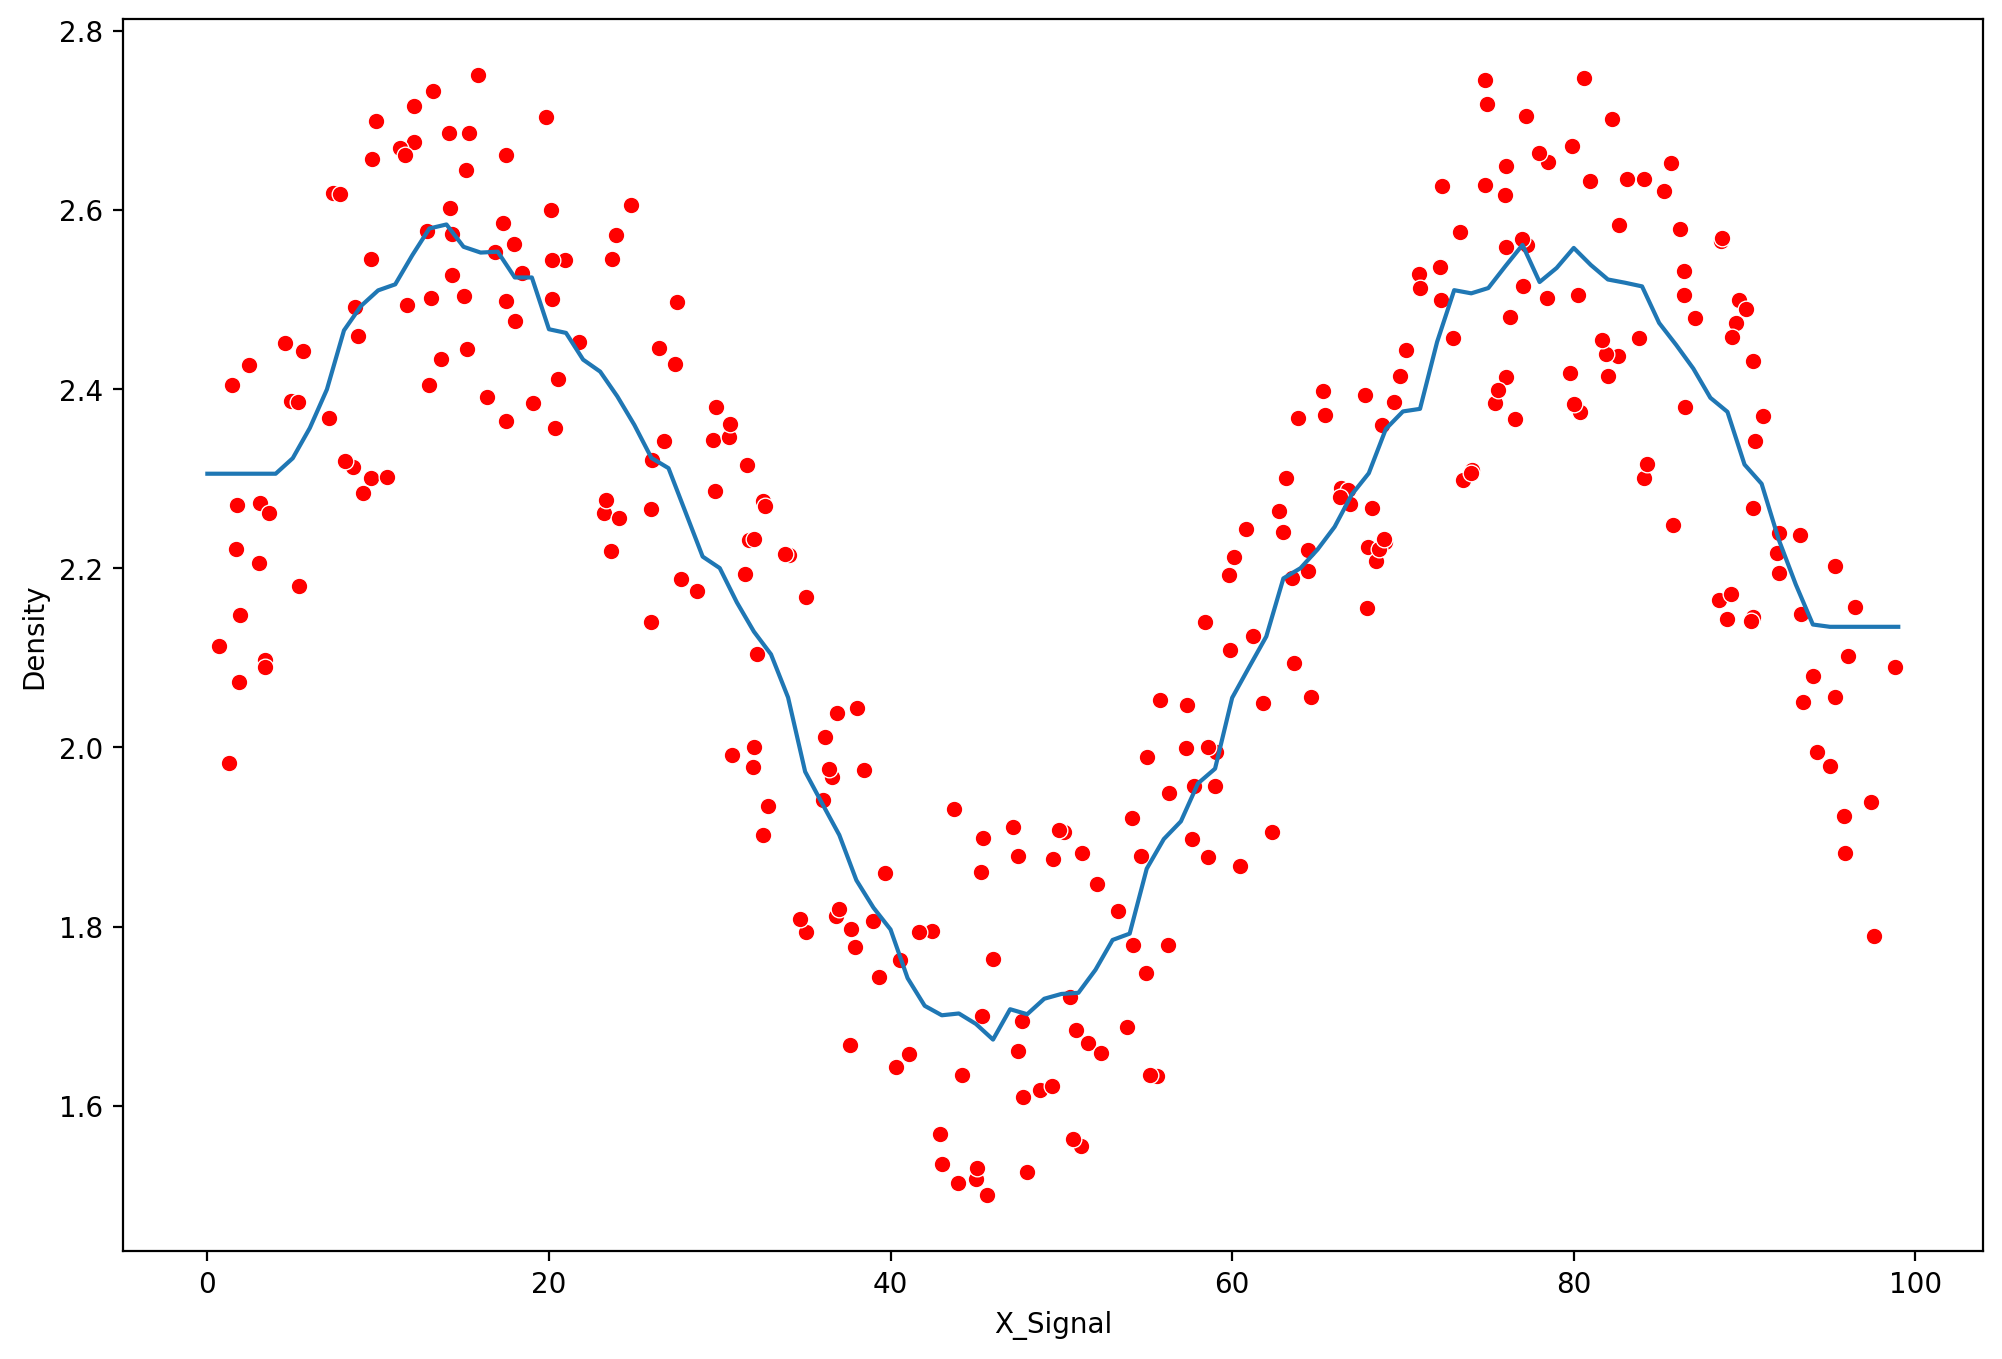

K value: 30
Model Trained
Model Predicted
RMSE: 0.15954234753677107
MAE: 0.13363165935705318
Scatter plot with regression line


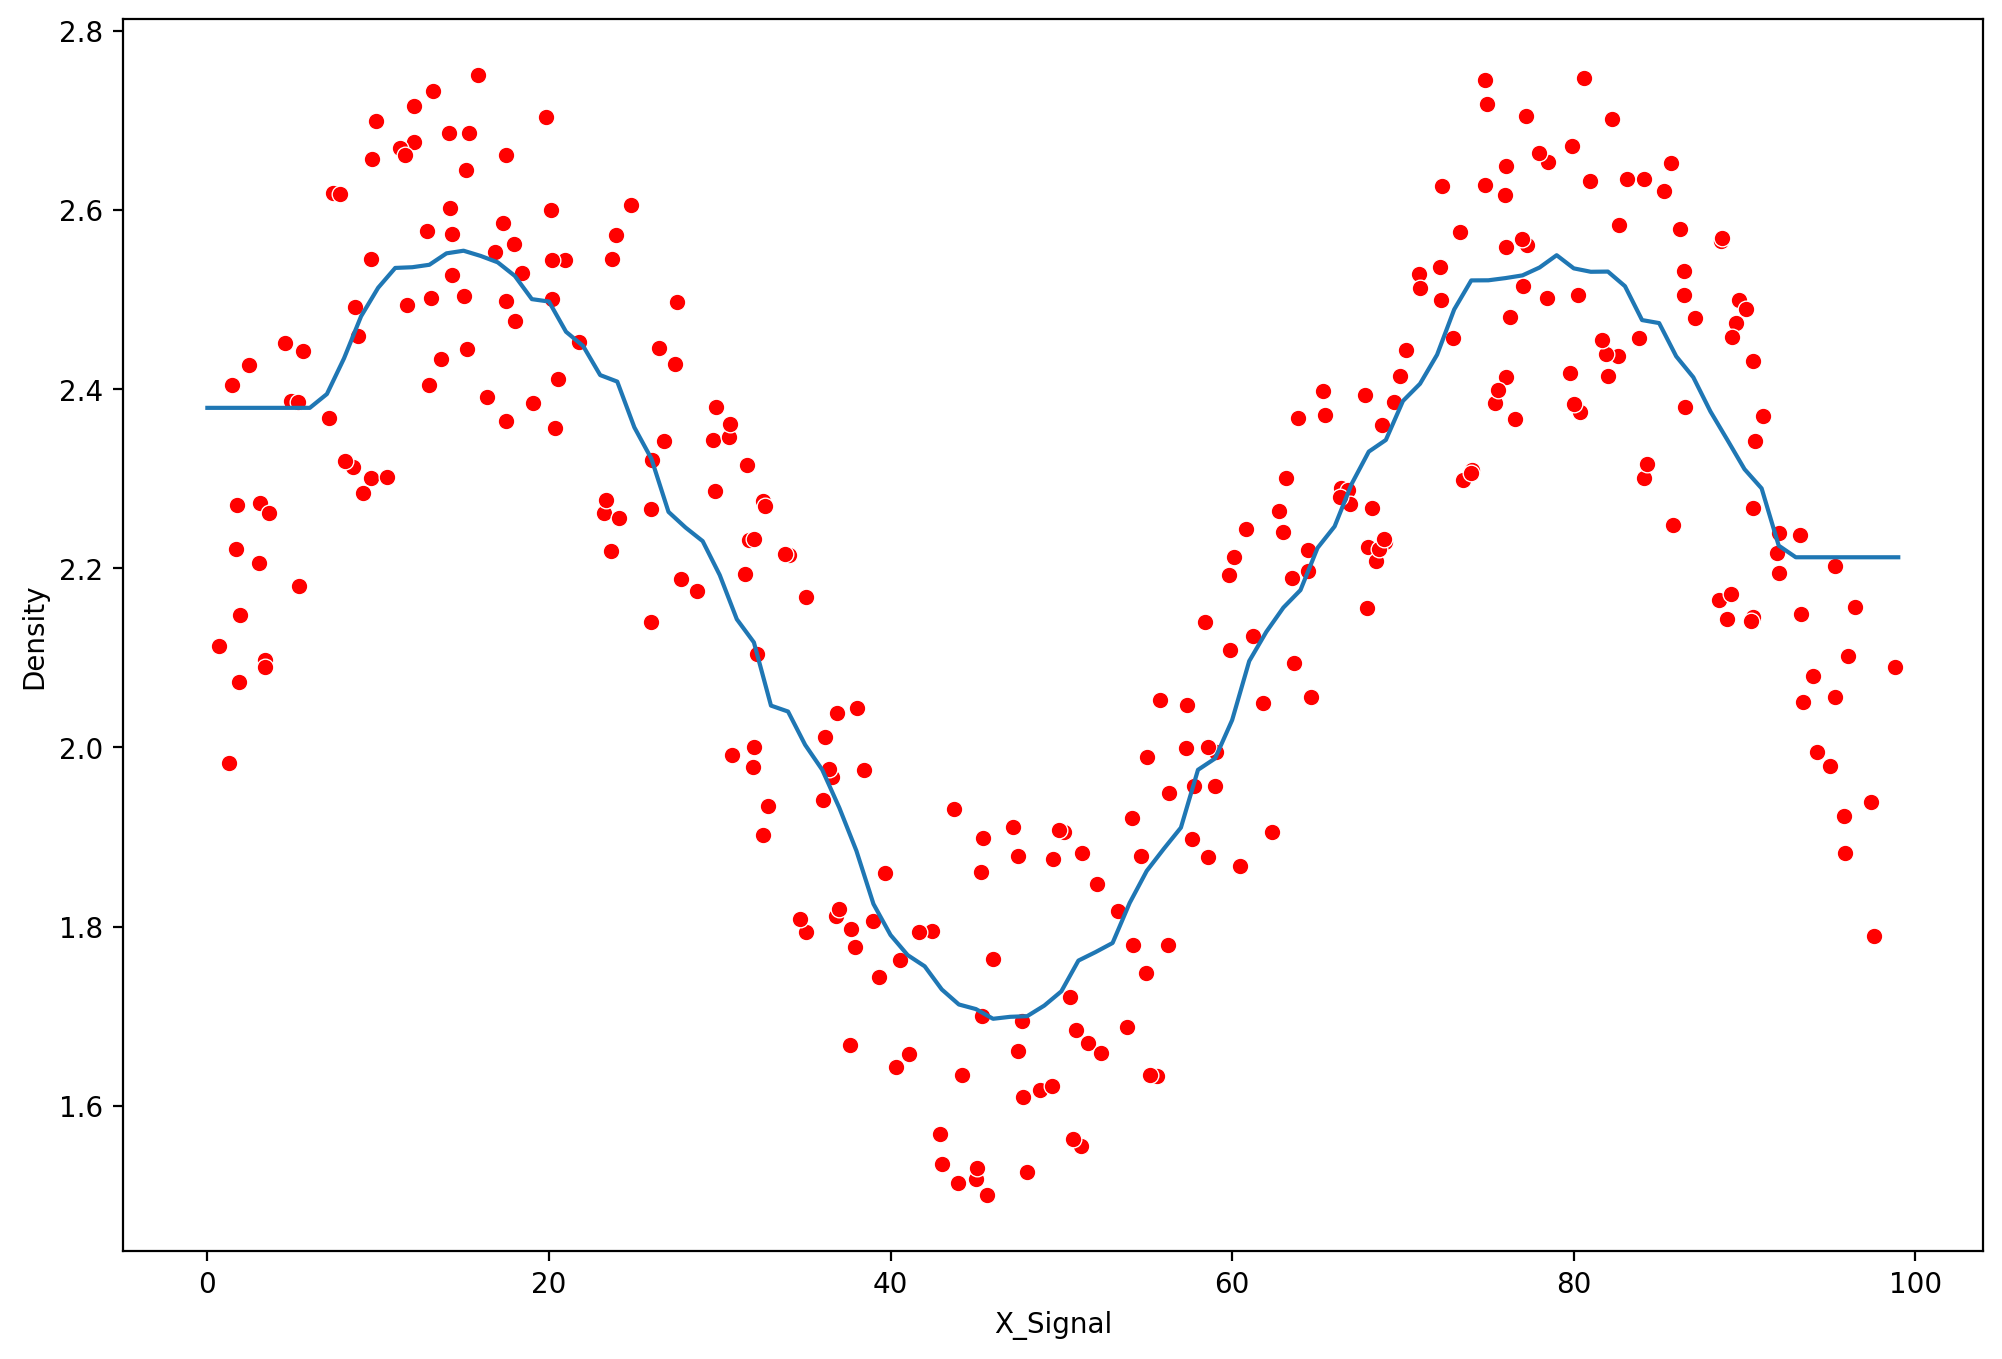

In [73]:
k_values = [20, 30]

for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    print(f'K value: {n}')
    run_model(model, X_train, y_train, X_test, y_test)

# Decision Tree Model

In [74]:
from sklearn.tree import DecisionTreeRegressor

Model Trained
Model Predicted
RMSE: 0.1523487028635337
MAE: 0.11877297474442378
Scatter plot with regression line


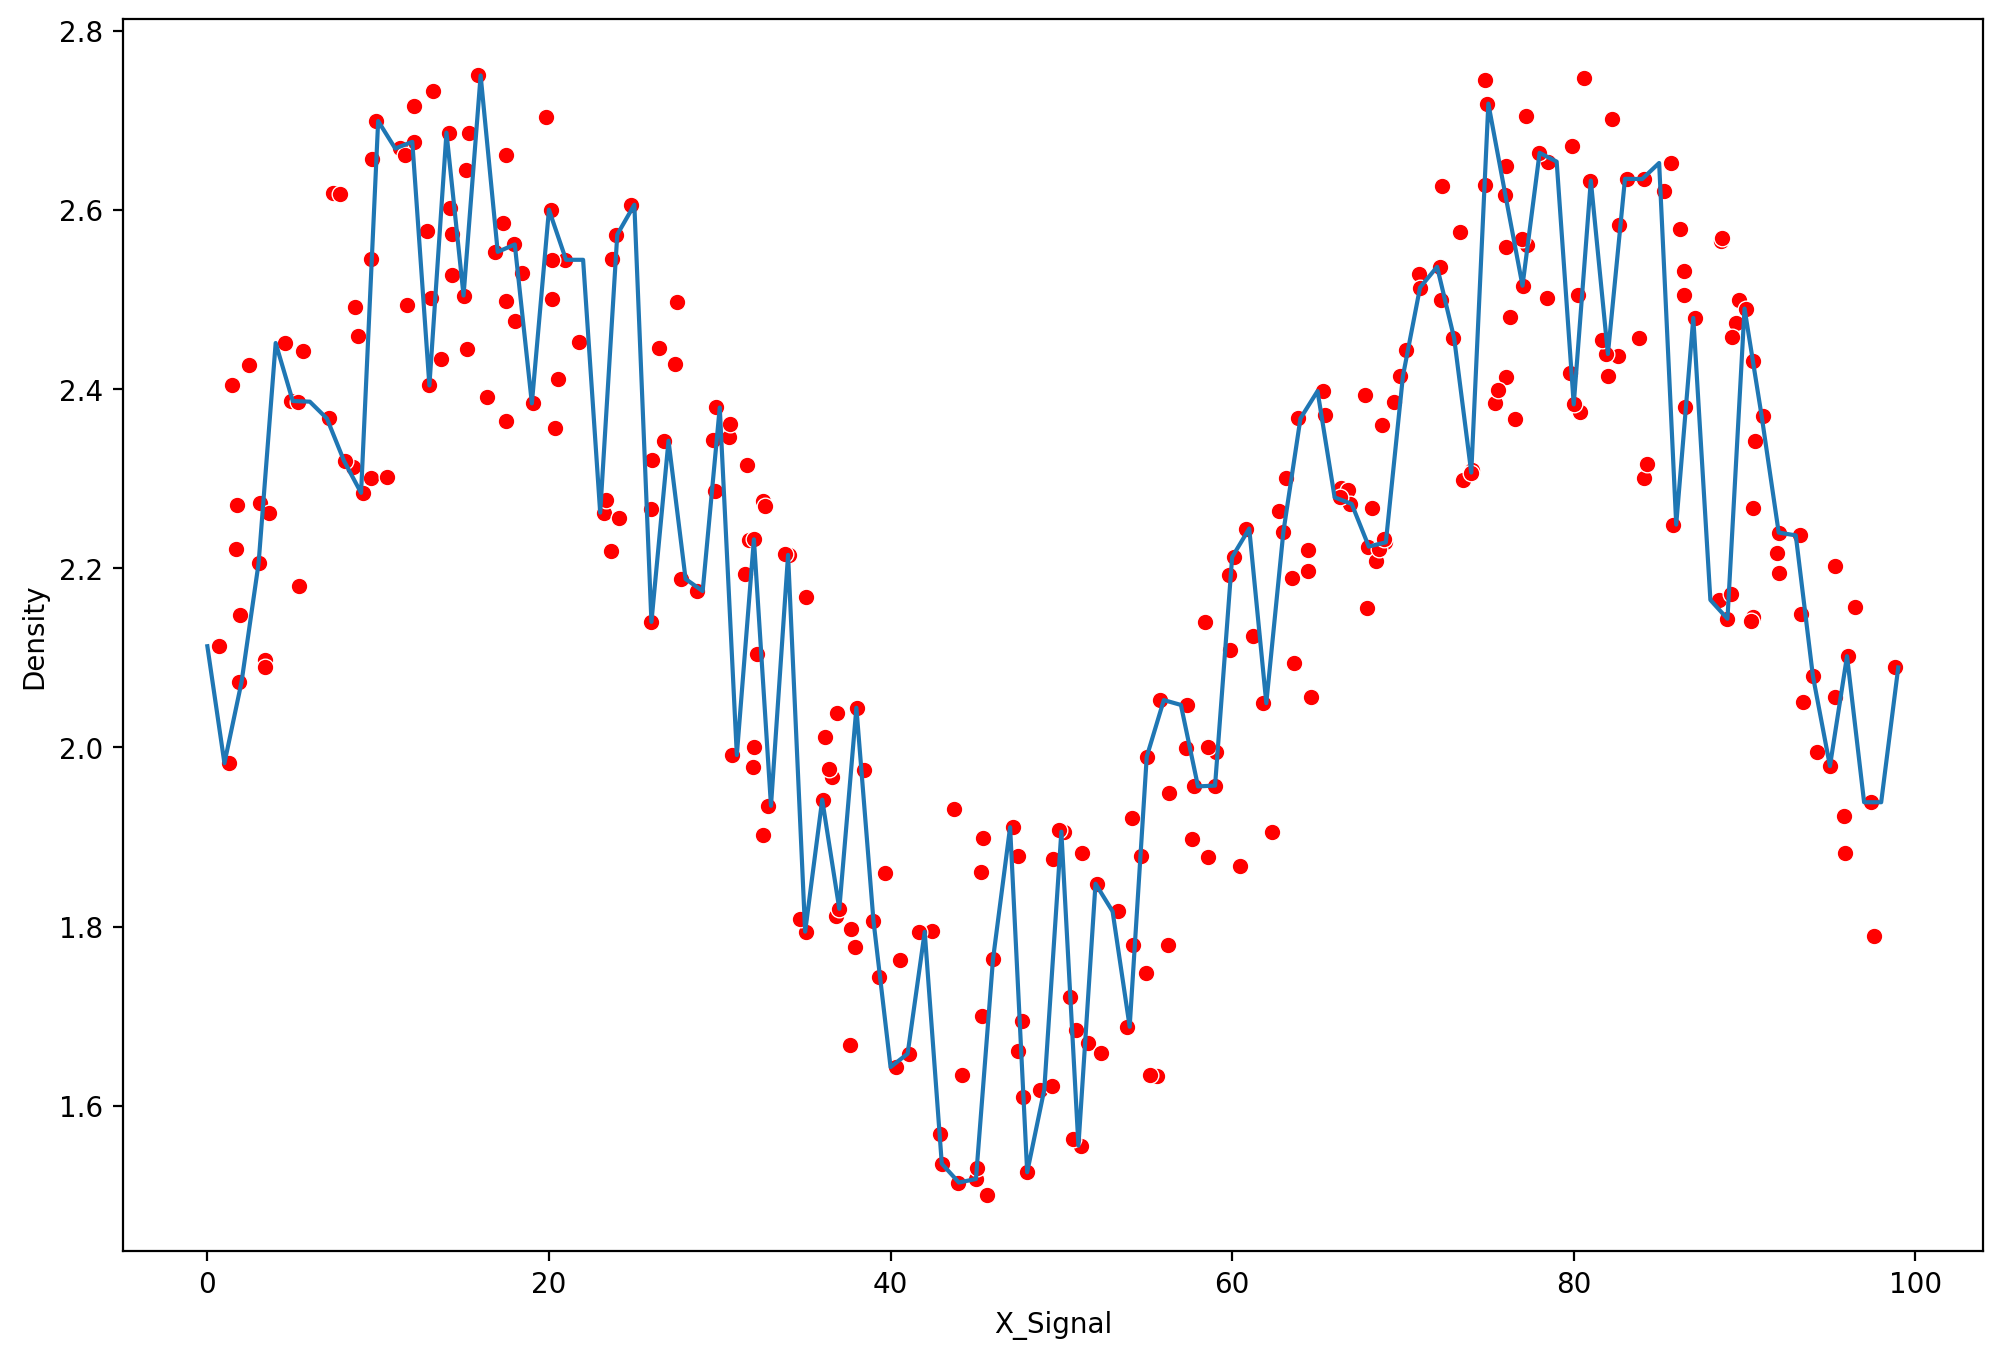

In [75]:
model = DecisionTreeRegressor()
run_model(model, X_train, y_train, X_test, y_test)

# Support Vector Machine Model

In [78]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [79]:
svr = SVR()
param_grid = {'C':[0.01, 0.1, 1, 5, 10, 100, 1000],
              'gamma': ['auto', 'scale']}
grid = GridSearchCV(svr, param_grid)

Model Trained
Model Predicted
RMSE: 0.12646999302046696
MAE: 0.10854210121348368
Scatter plot with regression line


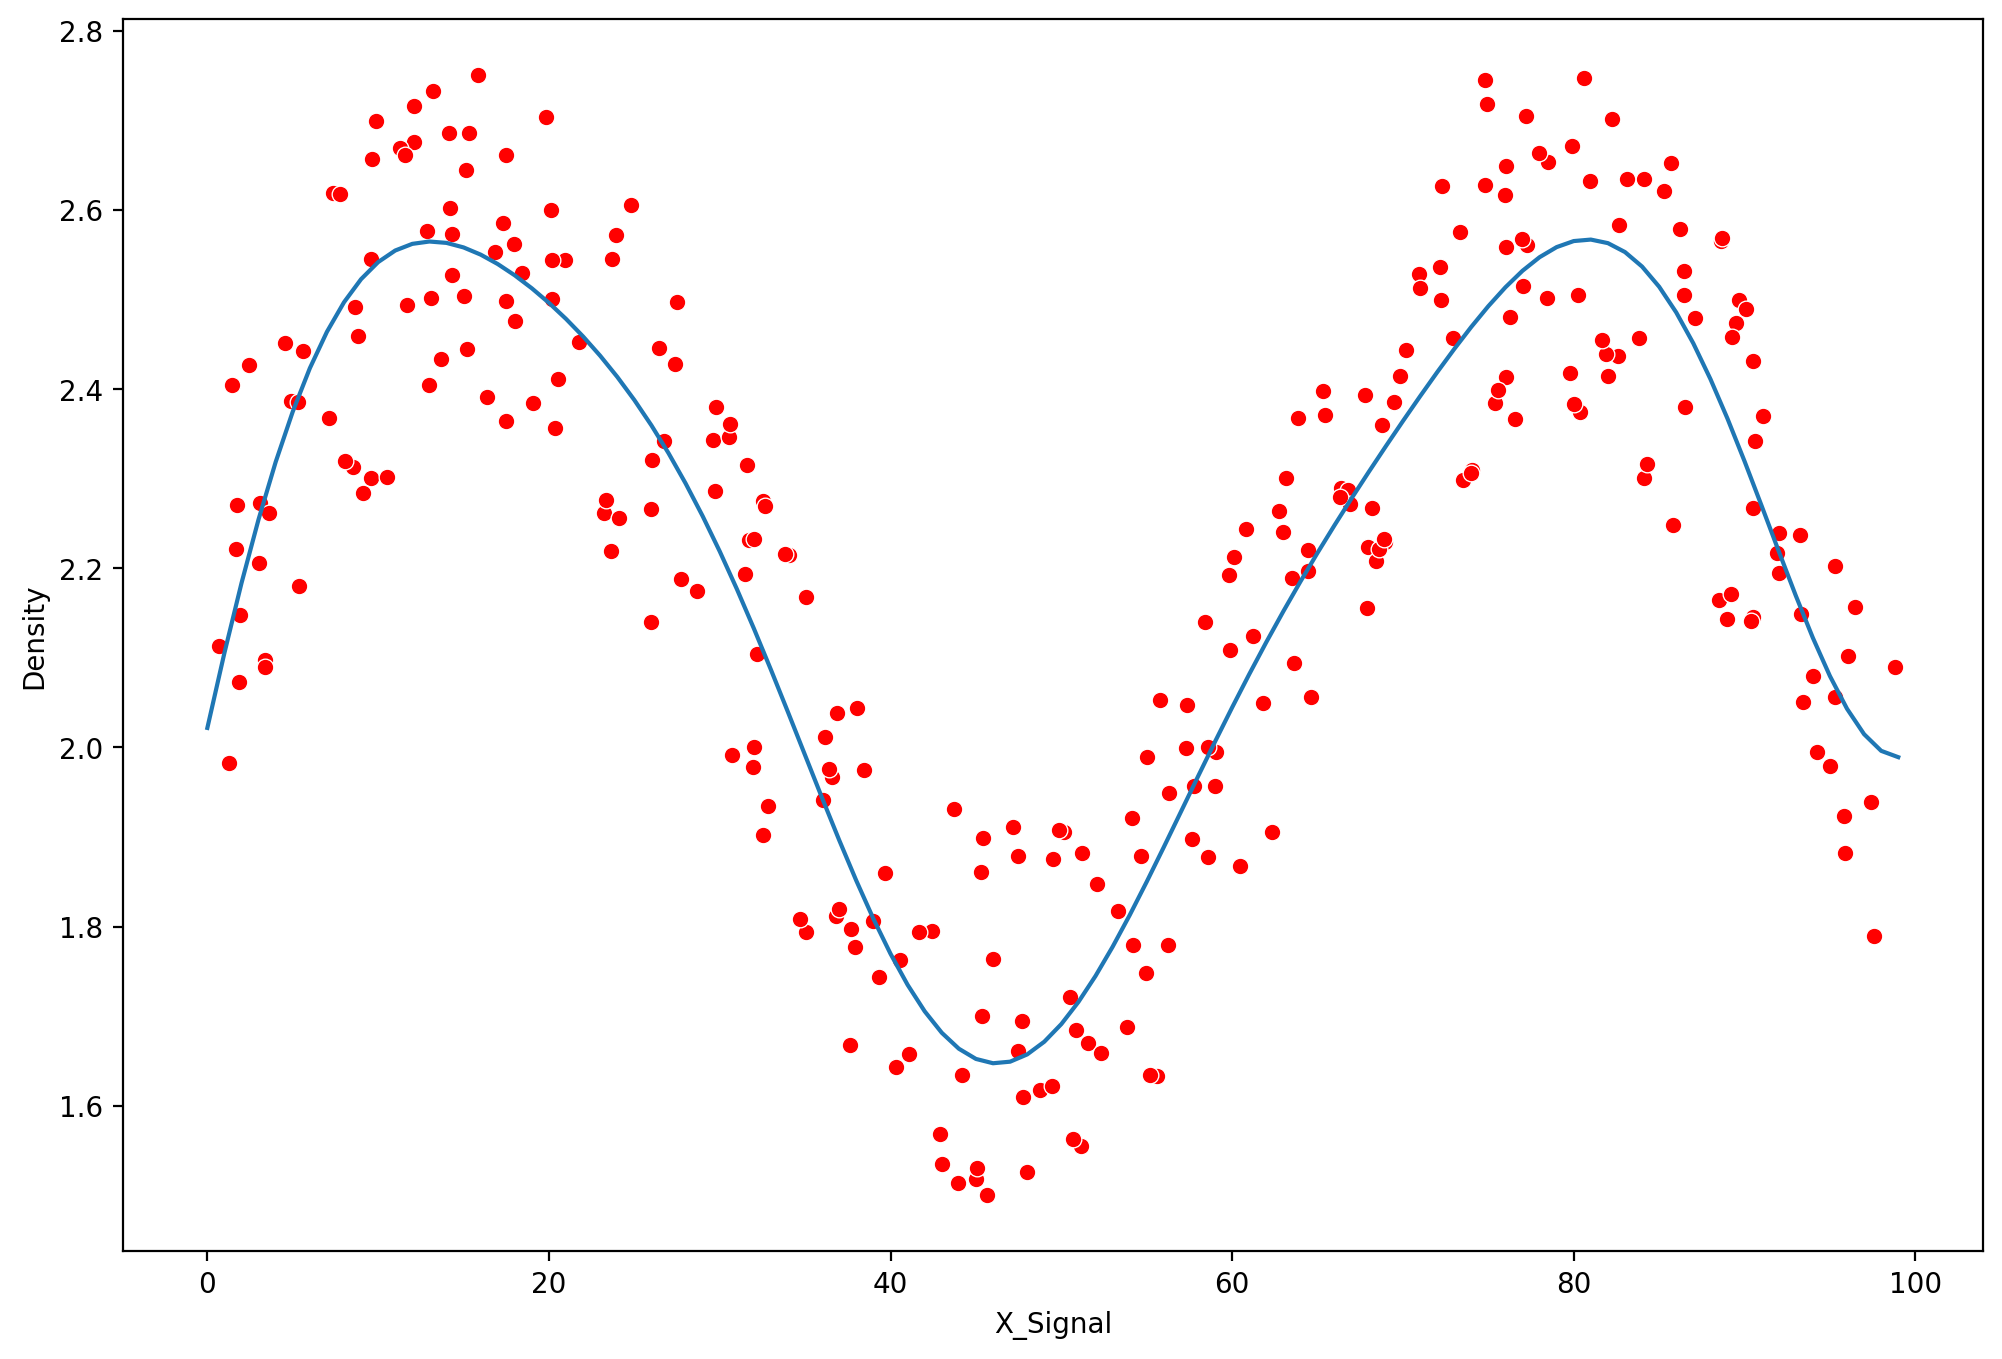

In [80]:
run_model(grid, X_train, y_train, X_test, y_test)

In [82]:
grid.best_params_

{'C': 1000, 'gamma': 'scale'}

# Random Forest Regressor

In [83]:
from sklearn.ensemble import RandomForestRegressor

Model Trained
Model Predicted
RMSE: 0.12655114358983693
MAE: 0.10487506879416703
Scatter plot with regression line


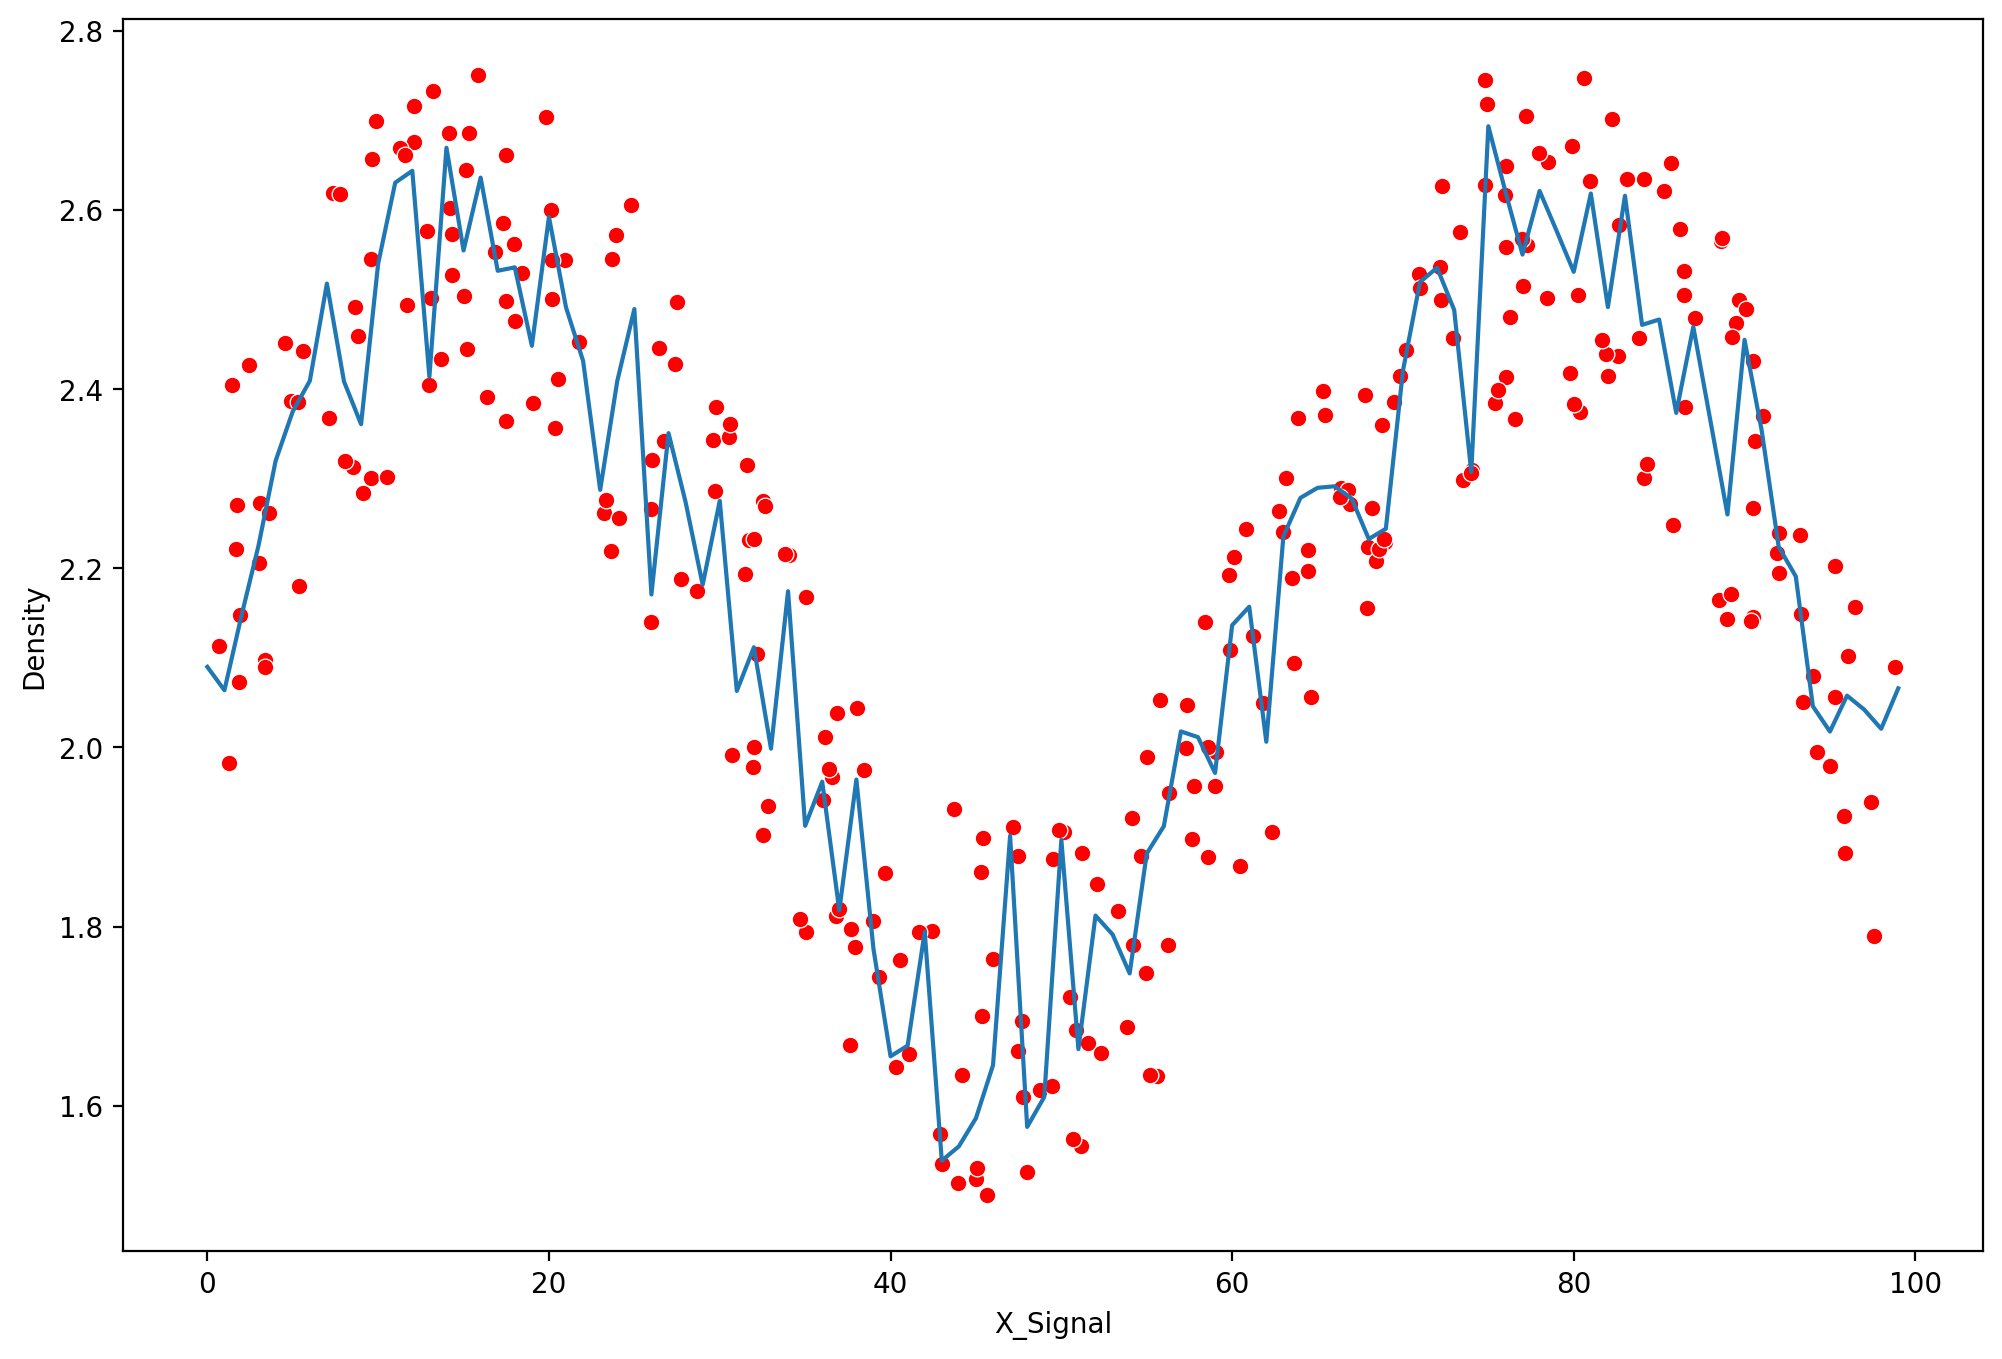

In [84]:
rfr = RandomForestRegressor(n_estimators = 10)
run_model(rfr, X_train, y_train, X_test, y_test)